In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
# dataset link: 'https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python'
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [99]:
df.shape

(200, 5)

In [100]:
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


<Axes: xlabel='Gender', ylabel='count'>

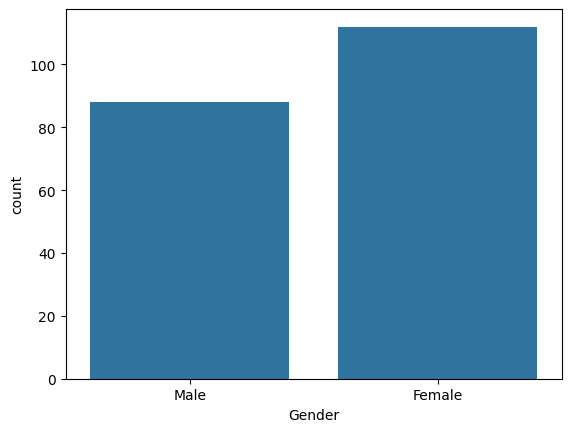

In [103]:
sns.countplot(x='Gender', data=df)

Skewness of Age is 0.48556885096681657


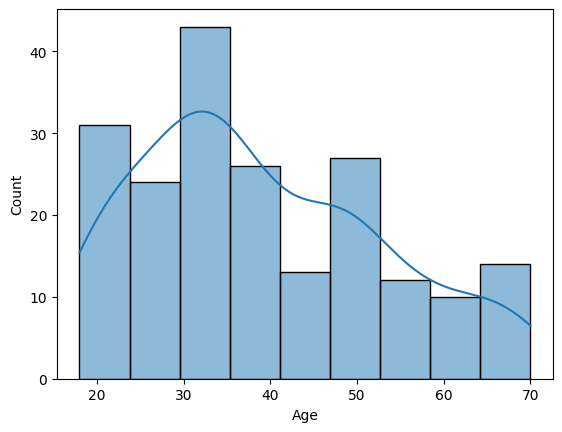

Skewness of Annual Income (k$) is 0.3218425498619055


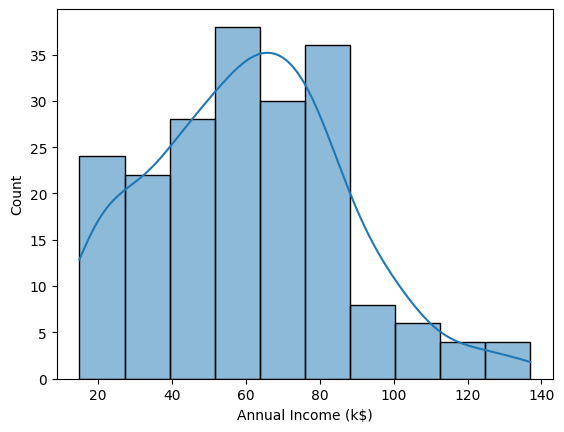

Skewness of Spending Score (1-100) is -0.047220201374263374


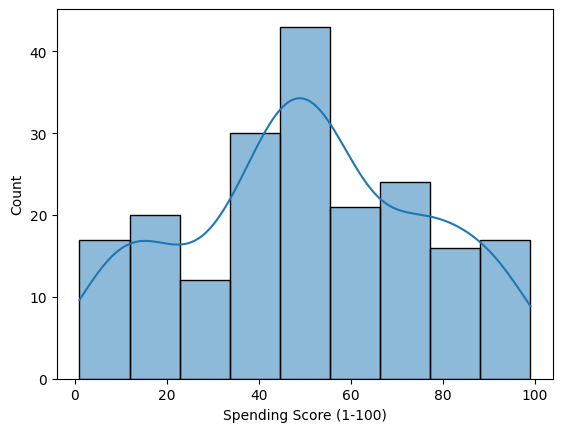

In [104]:
num_col = df.drop('Gender',axis=1).columns
for col in num_col:
  sns.histplot(x=col,kde=True,data=df)
  skewness = df[col].skew()
  print(f"Skewness of {col} is {skewness}")
  plt.show()

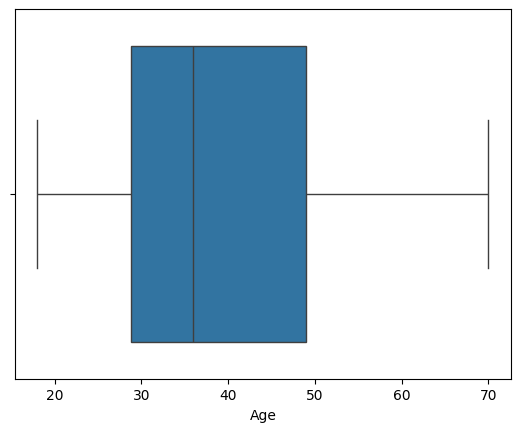

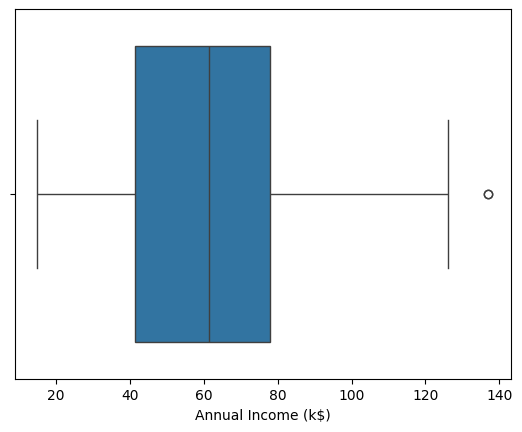

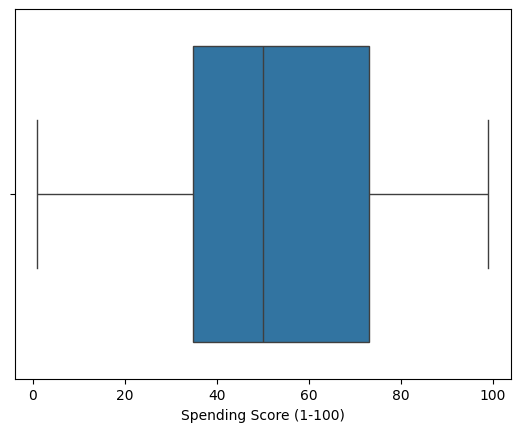

In [105]:
for col in num_col:
  sns.boxplot(x=col,data=df)
  plt.show()

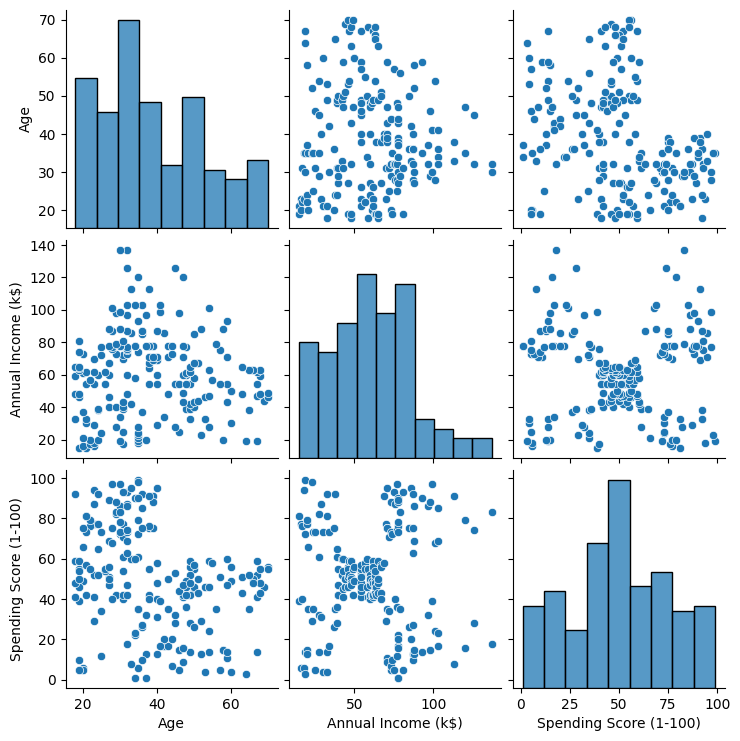

In [106]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [107]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True,dtype=int)
df_encoded.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [108]:
from sklearn.preprocessing import StandardScaler

binary_cols = ['Gender_Male']
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df_encoded[numeric_cols])

X_final = np.concatenate([scaled_numeric, df_encoded[binary_cols].values], axis=1)

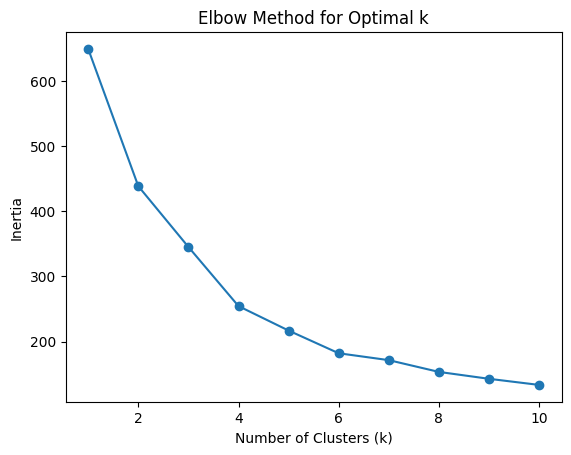

In [109]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_final)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [111]:
kmeans = KMeans(n_clusters=6, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(X_final)
df_encoded.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,19,15,39,1,4
1,21,15,81,1,4
2,20,16,6,0,2
3,23,16,77,0,4
4,31,17,40,0,2


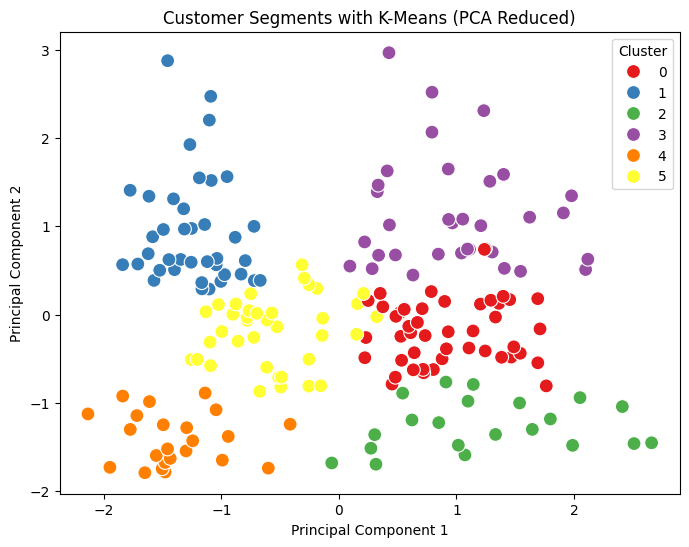

In [112]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_final)

df_encoded['PCA1'] = X_pca[:, 0]
df_encoded['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_encoded, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segments with K-Means (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [113]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_final, df_encoded['Cluster'])
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.36


In [114]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_final)
    score = silhouette_score(X_final, labels)
    print(f"k={k}, Silhouette Score={score:.2f}")

k=2, Silhouette Score=0.30
k=3, Silhouette Score=0.31
k=4, Silhouette Score=0.35
k=5, Silhouette Score=0.35
k=6, Silhouette Score=0.36
k=7, Silhouette Score=0.33
k=8, Silhouette Score=0.34
k=9, Silhouette Score=0.31
k=10, Silhouette Score=0.31


In [116]:
df_encoded['Cluster'] = kmeans.labels_
df_encoded.groupby('Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,PCA1,PCA2
Cluster,,,,,,
0,63.818182,53.272727,49.500000,0.636364,1.304048,-0.221011
1,25.272727,25.727273,79.363636,0.409091,-1.428880,-1.393304
2,32.086957,90.000000,81.391304,0.086957,-1.260619,1.053414
3,46.818182,81.727273,16.590909,0.636364,1.295917,0.874254
4,30.466667,33.133333,41.066667,0.200000,-0.136796,-1.058504
5,46.366667,55.200000,48.766667,0.266667,0.422794,-0.194725
6,22.222222,62.740741,42.666667,0.518519,-0.636894,0.064243
7,50.785714,26.357143,14.142857,0.428571,1.650539,-1.232871
8,33.562500,81.562500,83.187500,1.000000,-1.186612,0.768386


<Axes: xlabel='Cluster', ylabel='count'>

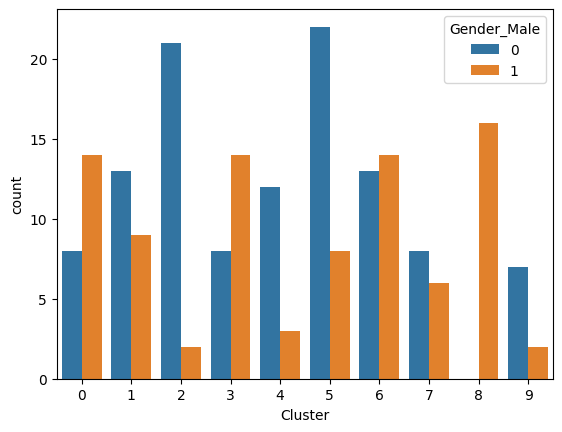

In [119]:
sns.countplot(data=df_encoded, x='Cluster', hue='Gender_Male')